In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
torch.cuda.is_available()

True

In [5]:
torch.backends.cudnn.enabled

True

In [6]:
PATH = "data/dogbreed/"
sz=224

In [7]:
os.listdir(PATH)

['sample_submission.csv',
 'test',
 'zipped_files',
 'labels.csv',
 'subm',
 'train',
 'tmp']

In [8]:
files = os.listdir(f'{PATH}test')[:5]

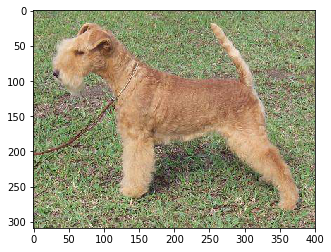

In [9]:
img = plt.imread(f'{PATH}test/{files[2]}')
plt.imshow(img)

In [10]:
img.shape

(309, 400, 3)

In [11]:
label_df = pd.read_csv(f'{PATH}/labels.csv')
label_df.head(5)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [12]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending = False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [13]:
arch = resnext101_64
sz = 224
bs = 58

In [14]:
labels_csv = f'{PATH}/labels.csv'
n = len(list(open(labels_csv))) - 1
val_idx = get_cv_idxs(n)

In [15]:
tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1)
data = ImageClassifierData.from_csv(PATH, 'train', labels_csv, bs, tfms, val_idx, '.jpg', 'test' )

In [16]:
len(data.trn_ds), len(data.test_ds)

(8178, 10357)

In [17]:
len(data.classes), data.classes[:5]

(120,
 ['affenpinscher',
  'afghan_hound',
  'african_hunting_dog',
  'airedale',
  'american_staffordshire_terrier'])

In [18]:
fn = PATH + data.trn_ds.fnames[0]
fn

'data/dogbreed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

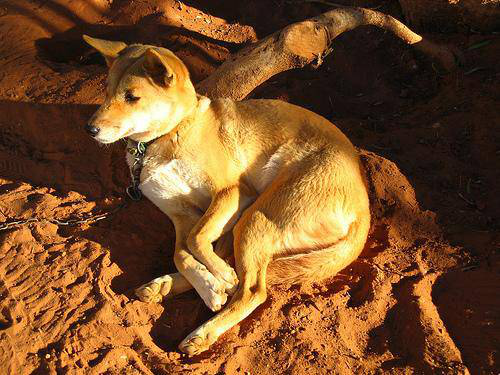

In [19]:
img = PIL.Image.open(fn)
img
#plt.imshow(plt.imread(fn))

In [20]:
img.size

(500, 375)

In [21]:
size_dict = {k : PIL.Image.open(PATH + k).size for k in data.trn_ds.fnames}

In [22]:
size_dict

{'train/001513dfcb2ffafc82cccf4d8bbaba97.jpg': (500, 375),
 'train/001cdf01b096e06d78e9e5112d419397.jpg': (500, 375),
 'train/0021f9ceb3235effd7fcde7f7538ed62.jpg': (500, 500),
 'train/002211c81b498ef88e1b40b9abf84e1d.jpg': (500, 375),
 'train/00290d3e1fdd27226ba27a8ce248ce85.jpg': (500, 470),
 'train/002a283a315af96eaea0e28e7163b21b.jpg': (231, 227),
 'train/0042188c895a2f14ef64a918ed9c7b64.jpg': (500, 332),
 'train/0067dc3eab0b3c3ef0439477624d85d6.jpg': (402, 343),
 'train/006cc3ddb9dc1bd827479569fcdc52dc.jpg': (250, 223),
 'train/00792e341f3c6eb33663e415d0715370.jpg': (200, 192),
 'train/007b5a16db9d9ff9d7ad39982703e429.jpg': (374, 212),
 'train/007b8a07882822475a4ce6581e70b1f8.jpg': (333, 500),
 'train/007ff9a78eba2aebb558afea3a51c469.jpg': (500, 375),
 'train/008ba178d6dfc1a583617470d19c1673.jpg': (390, 320),
 'train/009509be3ca7cce0ff9e37c8b09b1125.jpg': (400, 346),
 'train/00a338a92e4e7bf543340dc849230e75.jpg': (200, 280),
 'train/00a366d4b4a9bbb6c8a63126697b7656.jpg': (500, 375

In [23]:
row_sz, col_sz =list(zip(*size_dict.values()))

In [24]:
row_sz = np.array(row_sz); col_sz = np.array(col_sz)

In [25]:
row_sz[:5]

array([500, 500, 500, 500, 500])

In [26]:
col_sz[:5]

array([375, 375, 500, 375, 470])

(array([3023., 5024.,   92.,   15.,    5.,    3.,   13.,    2.,    0.,    1.]),
 array([  97. ,  413.7,  730.4, 1047.1, 1363.8, 1680.5, 1997.2, 2313.9, 2630.6, 2947.3, 3264. ]),
 <a list of 10 Patch objects>)

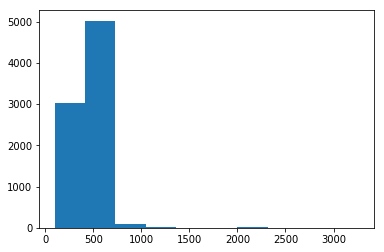

In [27]:
plt.hist(row_sz)

(array([ 135.,  592., 1347., 1164., 4599.,  128.,   76.,   62.,   14.,   11.]),
 array([ 97. , 185.5, 274. , 362.5, 451. , 539.5, 628. , 716.5, 805. , 893.5, 982. ]),
 <a list of 10 Patch objects>)

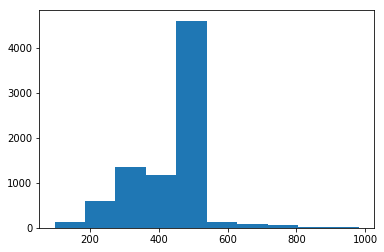

In [28]:
plt.hist(row_sz[row_sz < 1000])

(array([2870., 5121.,  128.,   25.,   10.,   15.,    5.,    2.,    0.,    2.]),
 array([ 102.,  348.,  594.,  840., 1086., 1332., 1578., 1824., 2070., 2316., 2562.]),
 <a list of 10 Patch objects>)

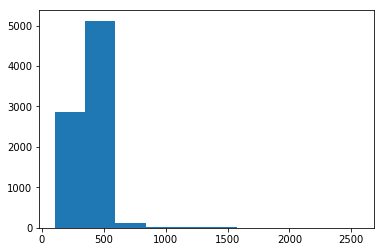

In [29]:
plt.hist(col_sz)

(array([ 235.,  733., 2205., 2979., 1807.,   98.,   27.,   33.,    7.,   10.]),
 array([102., 190., 278., 366., 454., 542., 630., 718., 806., 894., 982.]),
 <a list of 10 Patch objects>)

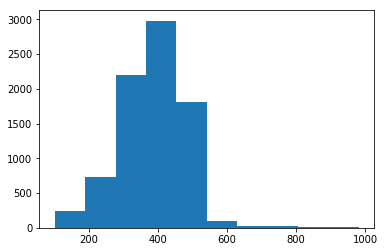

In [30]:
plt.hist(col_sz[col_sz < 1000])

In [31]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms= transforms_side_on, max_zoom= 1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', labels_csv, bs, tfms, val_idx, '.jpg', 'test', num_workers=4 )
    
    return data if sz > 300 else data.resize(340, 'tmp')

In [32]:
data = get_data(sz, bs)

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [33]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [34]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 89%|████████▉ | 126/141 [00:03<00:00, 37.84it/s, loss=16.3]


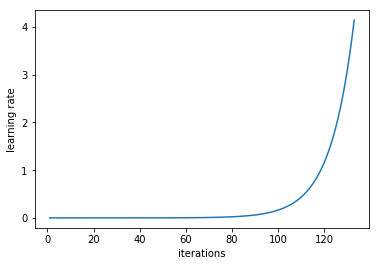

In [35]:
learn.sched.plot_lr()

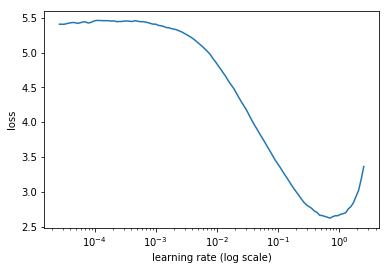

In [36]:
learn.sched.plot()

In [37]:
learn.fit(1e-2, n_cycle= 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.923169   0.387465   0.91092   
    1      0.418262   0.298885   0.921456                    
    2      0.296544   0.278835   0.921456                    



[0.27883515, 0.9214559396107992]

In [38]:
learn.save('224_pre')

In [39]:
learn.load('224_pre')

In [74]:
learn.set_data(get_data(299, bs))
learn.freeze()

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [33]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 82%|████████▏ | 116/141 [00:03<00:00, 33.47it/s, loss=10.8]


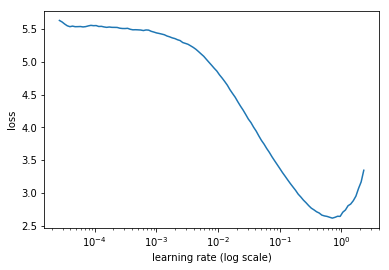

In [34]:
learn.sched.plot()

In [68]:
learn.fit(1e-2, 3, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.190614   0.643683   0.897031  
    1      0.606331   0.406068   0.921456                    
    2      0.433386   0.338969   0.91954                     



[0.3389694, 0.9195402363936106]

In [72]:
learn.fit(1e-2, 3, cycle_len = 1, cycle_mult= 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.295951   0.301439   0.923851  
    1      0.263519   0.292571   0.922414                    
    2      0.225537   0.279347   0.922893                    
    3      0.186364   0.257298   0.923372                    
    4      0.188513   0.290143   0.91954                     
    5      0.153396   0.269337   0.91954                     
    6      0.151427   0.267893   0.922893                    
    7      0.122989   0.28831    0.922414                    
    8      0.107195   0.280324   0.923851                    
    9      0.09997    0.24031    0.926245                     
    10     0.097847   0.259657   0.923851                     
    11     0.086583   0.240461   0.926245                     
    12     0.091166   0.263578   0.923851                     



[0.26357788, 0.9238505793942345]

In [37]:
learn.precompute = False

In [38]:
learn.fit(1e-2, 5, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.240474   0.62004    0.883621  
    1      0.667784   0.372693   0.909004                    
    2      0.495339   0.30839    0.918582                    
    3      0.4297     0.283648   0.923851                    
    4      0.363291   0.261324   0.923372                    



[0.261324, 0.9233716477950414]

In [39]:
learn.fit(1e-2, 1, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.322259   0.252039   0.929119  



[0.2520389, 0.9291187756591373]

In [40]:
learn.fit(1e-2, 2, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.305493   0.247297   0.923851  
    1      0.29176    0.242617   0.923851                    



[0.24261665, 0.92385057773855]

In [41]:
learn.fit(1e-2, 2, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.266135   0.238173   0.926245  
    1      0.242135   0.238879   0.91954                     



[0.23887876, 0.9195402330822415]

In [42]:
learn.fit(1e-2, 1, cycle_len = 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.23981    0.230216   0.924808  



[0.23021585, 0.9248084310028288]

In [100]:
import numpy as np

In [43]:
learn.save('299_pre')

In [44]:
learn.load('299_pre')

In [62]:
log_preds, y = learn.TTA(is_test=True)
#probs = np.exp(log_preds)
probs = np.mean(np.exp(log_preds),0)

 50%|█████     | 2/4 [04:09<04:09, 124.64s/it]

KeyboardInterrupt: 

In [64]:
#log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(10357, 120)

In [47]:
log_preds_test[500:1000]
probs = np.exp(log_preds_test)
probs[500:1000]

array([[0.00001, 0.     , 0.00001, ..., 0.00002, 0.0002 , 0.00001],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.03418],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       ...,
       [0.00004, 0.     , 0.00016, ..., 0.00003, 0.00005, 0.00023],
       [0.00001, 0.00002, 0.     , ..., 0.     , 0.00002, 0.00001],
       [0.00001, 0.00001, 0.00003, ..., 0.     , 0.00003, 0.00006]], dtype=float32)

In [65]:
#log_preds_test = np.argmax(log_preds_test, axis = 1)
#print (log_preds_test)
#accuracy_np(probs)
probs.shape
probs1 = np.mean(probs, axis = 0)
probs1.shape

(10357, 120)

In [66]:
print (probs.max(axis = 1)[:100])

[[0.99996 1.      1.      0.99986 0.99787 0.99984 0.99994 1.      0.99985 0.99969 1.      1.      0.99998
  0.99999 0.99997 0.99999 0.99497 0.99998 0.99996 0.9994  0.9998  0.99998 1.      0.99995 0.99996 0.99996
  0.99994 0.99998 0.99998 1.      1.      0.99999 0.99996 0.9998  0.99998 0.99999 0.99992 0.99953 0.99992
  0.99528 0.99999 0.99987 0.99993 0.8719  0.99993 0.99994 0.99918 0.9998  0.99981 0.99877 0.99995 0.99996
  0.99999 0.99965 0.99996 0.99999 0.99998 0.99995 0.99998 0.99947 0.99999 0.99997 0.99996 0.99994 0.99997
  1.      0.99995 0.99948 0.99868 1.      0.99976 0.99984 0.99981 1.      0.99998 0.99998 0.99823 0.99668
  0.99995 0.99981 1.      0.99998 0.99991 0.99999 0.99998 0.99998 0.99996 1.      0.99996 0.99982 0.99999
  0.99991 0.99988 0.99999 1.      0.99999 0.99999 0.9996  0.99996 0.99674 0.99989 0.99952 0.99998 1.
  0.99735 0.99948 0.99904 0.99999 0.99996 1.      0.99369 0.99994 0.99998 0.98961 0.99999 0.99999 0.99996
  0.99999 0.99944 0.99933]
 [0.99995 0.99998 1.    

In [50]:
log_preds_classes = [data.classes[i] for i in log_preds_test.]
#probs = np.exp(log_preds_test)
#print (max(probs))
print (probs.max(axis = 1))

SyntaxError: invalid syntax (<ipython-input-50-fb87a18d24e6>, line 1)

In [51]:
log_preds_classes[:50]

NameError: name 'log_preds_classes' is not defined

In [52]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [53]:
log_preds_test[12,]

array([-12.67624, -14.03532, -12.60535, -12.45534, -12.88804, -14.20136,  -0.00426, -13.49089, -12.46729,
       -12.72055, -13.98092, -14.43279, -15.44795, -14.22366, -13.78948, -12.9671 , -10.66257, -15.15351,
       -13.96469, -14.60066, -14.43344, -16.06717, -14.56521, -13.49866, -16.16075, -14.0153 , -11.05307,
       -11.52931, -15.90264, -13.88173, -13.76249, -13.38236, -15.72779, -15.62625, -14.10858,  -9.99763,
       -11.46868, -14.9111 , -15.29807, -12.71431, -11.71566, -12.18117, -14.72768, -15.66331, -14.53917,
       -13.18592, -12.66237, -14.75495, -15.87036, -15.98933, -13.74435, -12.56156, -15.89018, -15.28858,
       -13.58861, -14.1081 , -15.42501, -15.48238, -14.02301, -13.39724, -14.99567, -14.11053, -13.4553 ,
       -14.92535, -13.35732, -14.06914, -16.87658, -13.22859, -10.40112, -15.29918, -14.80151, -15.51068,
       -14.35864, -12.74508, -13.2895 , -14.89552, -15.42706, -13.578  , -15.03058,  -8.45772, -15.02935,
        -6.78117, -13.61257,  -9.89345, -12.96

In [67]:
output_df = pd.DataFrame(probs1)
output_df.columns = data.classes
output_df

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,6.871635e-07,9.722839e-07,7.448640e-07,7.702500e-07,6.116700e-07,2.169415e-06,7.732633e-07,8.966983e-07,3.185856e-06,1.149159e-07,...,4.137807e-07,3.778181e-07,8.819364e-07,7.449260e-07,4.816049e-06,4.894790e-07,2.782987e-06,2.307035e-05,2.676488e-07,3.698250e-07
1,2.335462e-06,6.501843e-06,6.331609e-07,1.254767e-06,8.766762e-07,2.095128e-08,1.822842e-07,1.243393e-06,2.296415e-06,9.712642e-08,...,3.426220e-07,3.936929e-07,3.823013e-07,5.966464e-08,1.789134e-07,1.259169e-06,2.278913e-06,3.683321e-07,6.336265e-06,6.974038e-07
2,3.157739e-05,9.093763e-06,9.717878e-06,1.693447e-03,1.318391e-04,2.131413e-05,5.954125e-05,1.198087e-05,1.519992e-05,1.715781e-05,...,4.513046e-05,3.936368e-05,1.817506e-05,6.525339e-05,5.161416e-06,1.983043e-04,3.867985e-05,3.808967e-05,4.386919e-01,3.249338e-05
3,1.238175e-04,2.197997e-05,1.383941e-05,1.157056e-04,1.362722e-05,4.696928e-06,3.188955e-05,2.118575e-05,1.419898e-04,1.986446e-05,...,1.400041e-05,4.883650e-05,2.070666e-05,3.054436e-06,1.664312e-05,3.954559e-05,5.189572e-05,1.697311e-05,2.947120e-03,1.487825e-04
4,6.213036e-06,1.057432e-05,2.929537e-06,5.251165e-06,2.528695e-05,7.131917e-06,1.456656e-07,9.189982e-07,4.857978e-07,3.739386e-07,...,3.009879e-06,4.709931e-07,3.107972e-06,9.603112e-08,2.447828e-06,1.003319e-06,1.629595e-07,1.802478e-05,1.047508e-05,1.883299e-06
5,2.615072e-04,7.414365e-06,8.707007e-05,1.084584e-05,6.152982e-04,5.567697e-05,9.507058e-05,8.356545e-05,5.419718e-05,4.789513e-05,...,1.039798e-05,4.099667e-05,7.285000e-02,3.609157e-05,2.126657e-02,3.101980e-05,5.296107e-05,6.053654e-04,2.574353e-05,5.121824e-05
6,2.396592e-04,3.952932e-05,2.469328e-05,6.231668e-06,2.085204e-06,5.074278e-05,1.103579e-04,1.626858e-06,8.988560e-06,1.845927e-06,...,1.207270e-05,1.787460e-05,7.735037e-06,2.909097e-06,2.720120e-05,2.262106e-04,1.656081e-05,5.531707e-07,1.261488e-05,1.569464e-04
7,1.351810e-06,3.117702e-07,1.150192e-06,1.849438e-07,2.519837e-07,1.149886e-07,4.269791e-07,1.184907e-06,3.445049e-07,1.682113e-06,...,5.739784e-07,2.399436e-07,9.998085e-01,1.107624e-06,8.229902e-07,6.465251e-08,1.339127e-07,3.315893e-06,1.997301e-07,1.068469e-06
8,3.011612e-06,1.033982e-06,1.878786e-06,9.603187e-07,1.675061e-05,3.853628e-06,4.079082e-07,1.422370e-06,8.794335e-06,2.633027e-05,...,1.417411e-06,1.819093e-06,1.159847e-06,7.561223e-05,1.634188e-06,1.075078e-05,1.123390e-06,1.829473e-06,1.027232e-06,2.428358e-07
9,4.605585e-06,4.816211e-06,2.000109e-05,2.912220e-06,2.006906e-04,2.575145e-03,7.891426e-06,5.673755e-05,4.835325e-05,9.475523e-05,...,2.615400e-06,2.362748e-06,2.079005e-05,2.730107e-04,1.947779e-05,8.978160e-06,1.639749e-05,2.204565e-05,2.248390e-05,1.187183e-05


In [75]:
output_df.insert(loc = 0, column = 'id', value = [name[5 : -4] for name in data.test_ds.fnames])
output_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,6.871635e-07,9.722839e-07,7.448640e-07,7.702500e-07,6.116700e-07,2.169415e-06,7.732633e-07,8.966983e-07,3.185856e-06,...,4.137807e-07,3.778181e-07,8.819364e-07,7.449260e-07,4.816049e-06,4.894790e-07,2.782987e-06,2.307035e-05,2.676488e-07,3.698250e-07
1,6b423ca7020e70eb05732843c5d2bad1,2.335462e-06,6.501843e-06,6.331609e-07,1.254767e-06,8.766762e-07,2.095128e-08,1.822842e-07,1.243393e-06,2.296415e-06,...,3.426220e-07,3.936929e-07,3.823013e-07,5.966464e-08,1.789134e-07,1.259169e-06,2.278913e-06,3.683321e-07,6.336265e-06,6.974038e-07
2,74aa7e201e0e93e13e87b986a7d31839,3.157739e-05,9.093763e-06,9.717878e-06,1.693447e-03,1.318391e-04,2.131413e-05,5.954125e-05,1.198087e-05,1.519992e-05,...,4.513046e-05,3.936368e-05,1.817506e-05,6.525339e-05,5.161416e-06,1.983043e-04,3.867985e-05,3.808967e-05,4.386919e-01,3.249338e-05
3,a079f72193264bc5685e5d28d7372680,1.238175e-04,2.197997e-05,1.383941e-05,1.157056e-04,1.362722e-05,4.696928e-06,3.188955e-05,2.118575e-05,1.419898e-04,...,1.400041e-05,4.883650e-05,2.070666e-05,3.054436e-06,1.664312e-05,3.954559e-05,5.189572e-05,1.697311e-05,2.947120e-03,1.487825e-04
4,583f7580fa5fec1266331fcf83b76fd6,6.213036e-06,1.057432e-05,2.929537e-06,5.251165e-06,2.528695e-05,7.131917e-06,1.456656e-07,9.189982e-07,4.857978e-07,...,3.009879e-06,4.709931e-07,3.107972e-06,9.603112e-08,2.447828e-06,1.003319e-06,1.629595e-07,1.802478e-05,1.047508e-05,1.883299e-06


In [77]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok = True)
output_df.to_csv(f'{SUBM}subm.csv.gz', compression = 'gzip', index=False)

In [78]:
FileLink(f'{SUBM}subm.csv.gz')

/home/paperspace/fastai/courses/dl1/data/dogbreed/subm/.gz